In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import csv,os,re
import sklearn
import numpy as np
import pickle

In [48]:
df = pd.read_csv(r'Data/lyrics_normalized.csv')

In [49]:
df.head(30)

,song,artist,genre,lyrics,Unique_Word_Count,Type-Token Ratio,Sentiment Polarity,Word Density
0,ego-remix,beyonce-knowles,Pop,"Oh baby, how you doing?. You know I'm gonna cu...",0.507937,0.367206,0.148268,0.752106
1,then-tell-me,beyonce-knowles,Pop,"playin' everything so easy,. it's like you see...",0.565079,0.546512,0.115729,0.864813
2,honesty,beyonce-knowles,Pop,If you search. For tenderness. It isn't hard t...,0.634921,0.700000,0.004720,0.917624
3,you-are-my-rock,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I. [Verse 1:]. If I wrote...",0.526984,0.293103,0.407280,0.830936
4,black-culture,beyonce-knowles,Pop,"Party the people, the people the party it's po...",0.819048,0.195513,-0.170833,0.728790
5,all-i-could-do-was-cry,beyonce-knowles,Pop,I heard. Church bells ringing. I heard. A choi...,0.768254,0.534722,0.336111,0.933059
6,once-in-a-lifetime,beyonce-knowles,Pop,This is just another day that I would spend. W...,0.622222,0.416949,0.231081,0.826878
7,waiting,beyonce-knowles,Pop,"Waiting, waiting, waiting, waiting. Waiting, w...",0.619048,0.321244,0.240722,0.850002
8,slow-love,beyonce-knowles,Pop,[Verse 1:]. I read all of the magazines. while...,0.549206,0.331818,0.122468,0.834955
9,why-don-t-you-love-me,beyonce-knowles,Pop,"N-n-now, honey. You better sit down and look a...",0.590476,0.390029,0.278853,0.793906


In [50]:
artist_polarity_group = df['Sentiment Polarity'].groupby(df['artist'])
artist_ttr_group = df['Type-Token Ratio'].groupby(df['artist'])


In [51]:
artist_polarity_mean = artist_polarity_group.describe()['mean']
artist_ttr_mean = artist_ttr_group.describe()['mean']

In [9]:
artist_mean_data = pd.concat([artist_polarity_mean,artist_ttr_mean],axis = 1)

In [10]:
artist_mean_vals = artist_mean_data.values

In [11]:
from sklearn.cluster import KMeans

#Judge the optimal number of clusters to use for the k-means algorithm by the elbow method
#Determine which value of number of clusters minimises the cost function

def get_optimal_k(a,b,data): #Determine cost function(i.e. inertia_ value) for clusters ranging from 2 to 10
    inertia_values = []
    for x in range(a,b+1):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(data) #Train model with specified number of clusters
        inertia_values.append((x,kmeans.inertia_))
    return inertia_values

In [12]:
clustering_data = []


In [33]:
inertia_values = get_optimal_k(2,20,artist_mean_vals)

In [40]:

sorted(inertia_values,key = lambda x: x[1])
clustering_data.extend(inertia_values)

In [41]:
clustering_data = [(x,y/x) for (x,y) in clustering_data]
num_of_clusters = [x for (x,y) in clustering_data]
average_wss =[y for (x,y) in clustering_data]


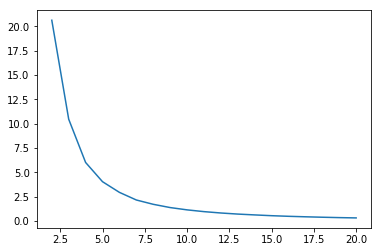

In [42]:
plt.plot(num_of_clusters,average_wss) #Elbow point curve suggest 5 is the optimal number of clusters

In [13]:
kmeans_artist = KMeans(n_clusters = 5, random_state = 0).fit(artist_mean_vals)

In [14]:
cluster_labels = kmeans_artist.labels_

In [15]:
np.bincount(cluster_labels)

array([1065,  897,  753, 1191, 1034], dtype=int64)

In [11]:
df.columns

Index(['song', 'artist', 'genre', 'lyrics', 'Unique_Word_Count',
       'Type-Token Ratio', 'Sentiment Polarity', 'Word Density'],
      dtype='object')

APPLYING CLUSTERING ON ALL FOUR EXTRACTED CONTIN. NUMERIC FEATURES

In [52]:
artist_word_count_group = df['Unique_Word_Count'].groupby(df['artist'])
artist_word_density_group = df['Word Density'].groupby(df['artist'])

In [53]:
artist_word_count_mean = artist_word_count_group.describe()['mean']
artist_word_density_mean = artist_word_count_group.describe()['mean']

In [54]:
artist_mean_data2 = pd.concat([artist_polarity_mean,artist_ttr_mean,artist_word_count_mean,artist_word_density_mean],axis = 1)

In [59]:
artist_mean_array = artist_mean_data2.values

In [63]:
pickle.dump(artist_mean_array,open('Pickled models/artist-mean-array','wb'))

In [69]:
artist_list = list(artist_mean_data2.index)
pickle.dump(artist_list,open('Pickled models/artist-list','wb'))

In [20]:
artist_mean_values2 = artist_mean_data2.values


In [23]:
inertia_values = get_optimal_k(2,20,artist_mean_values2)

In [24]:
clustering_data_2 = []


In [25]:
sorted(inertia_values,key = lambda x: x[1])
clustering_data_2.extend(inertia_values)

In [26]:
clustering_data_2

[(2, 128.35639629651405),
 (3, 96.1692667020254),
 (4, 75.5176265685539),
 (5, 66.86792537833428),
 (6, 59.30528936802079),
 (7, 52.64588796612266),
 (8, 48.796696390248485),
 (9, 45.637406037669635),
 (10, 42.98007294189055),
 (11, 40.54394186738157),
 (12, 38.53990967619228),
 (13, 36.81734060372189),
 (14, 35.406174322967814),
 (15, 34.07377778026918),
 (16, 32.85449760145183),
 (17, 31.64675889763098),
 (18, 30.506592976766356),
 (19, 29.716269182638666),
 (20, 28.597996968267744)]

In [27]:
clustering_data_2 = [(x,y/x) for (x,y) in clustering_data_2]
num_of_clusters = [x for (x,y) in clustering_data_2]
average_wss =[y for (x,y) in clustering_data_2]

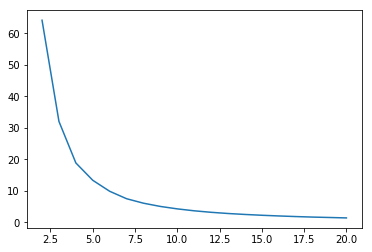

In [28]:
plt.plot(num_of_clusters,average_wss)

In [36]:
kmeans_artist = KMeans(n_clusters = 6, random_state = 0).fit(artist_mean_values2)

In [37]:
cluster_labels = kmeans_artist.labels_

In [38]:
np.bincount(cluster_labels)

array([ 679,  442, 1107, 1038, 1340,  334], dtype=int64)

In [2]:
#Pickling the model for use in the final step

In [3]:
filename = 'artist-level-clustering-model'

In [16]:
artist_wc_group = df['Unique_Word_Count'].groupby(df['artist'])
artist_wd_group = df['Word Density'].groupby(df['artist'])

In [17]:
artist_wc_mean = artist_wc_group.describe()['mean']
artist_wd_mean = artist_wd_group.describe()['mean']

In [18]:
artist_means = pd.concat([artist_polarity_mean,artist_ttr_mean,artist_wc_mean,artist_wd_mean],axis = 1)

In [20]:
artist_means = artist_means.values

In [21]:
inertia_values = get_optimal_k(2,20,artist_means)

In [22]:
clustering_data_2 = []


In [23]:
sorted(inertia_values,key = lambda x:x[1])

[(20, 27.370555424595377),
 (19, 28.054450849999505),
 (18, 28.774785891844566),
 (17, 29.631991106317443),
 (16, 30.622125992026643),
 (15, 31.60194685083504),
 (14, 32.68869216368666),
 (13, 33.99002084056379),
 (12, 35.40993118148283),
 (11, 36.92376668820025),
 (10, 38.662783814597155),
 (9, 40.90430079533368),
 (8, 43.47518414612281),
 (7, 46.49009652533485),
 (6, 50.567259685754244),
 (5, 56.58275009396911),
 (4, 64.5435506041785),
 (3, 74.83864104551196),
 (2, 105.81688522298043)]

In [24]:
clustering_data_2.extend(inertia_values)

In [25]:
clustering_data_2 = [(x,y/x) for (x,y) in clustering_data_2]
num_of_clusters = [x for (x,y) in clustering_data_2]
average_wss =[y for (x,y) in clustering_data_2]

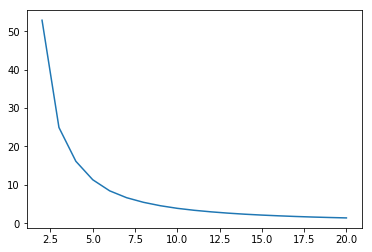

In [26]:
plt.plot(num_of_clusters,average_wss)

In [37]:
#K-means clustering with both 3 and 4 clusters:

kmeans_artist_four = KMeans(n_clusters = 4, random_state = 0).fit(artist_means)

In [43]:
cluster_labels = kmeans_artist_four.labels_

In [44]:
np.bincount(cluster_labels)

array([ 396, 1905, 1469, 1170], dtype=int64)

In [30]:
#With 3:

In [40]:
kmeans_artist_three = KMeans(n_clusters = 3, random_state = 0).fit(artist_means)

In [41]:
cluster_labels = kmeans_artist.labels_

In [42]:
np.bincount(cluster_labels)

array([2746, 1701,  493], dtype=int64)

Taking four as the number of clusters seems to produce more 'well-rounded' clusters.

In [45]:
pickle.dump(kmeans_artist_four, open(filename, 'wb'))